<a href="https://colab.research.google.com/github/kaustubhhatkar/DataScience_and_MachineLearning/blob/master/CSLAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 4


Name : Kaustubh Hatkar 
Roll no : 32128

In [42]:
import numpy as np 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

In [43]:
df = pd.read_csv("Iris.csv") 
print(df.head()) 

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


#Checking if data cleaning is required

In [44]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [45]:
df.describe() 

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [46]:
print(df.isnull().sum())


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


#Exploratory Data Analysis


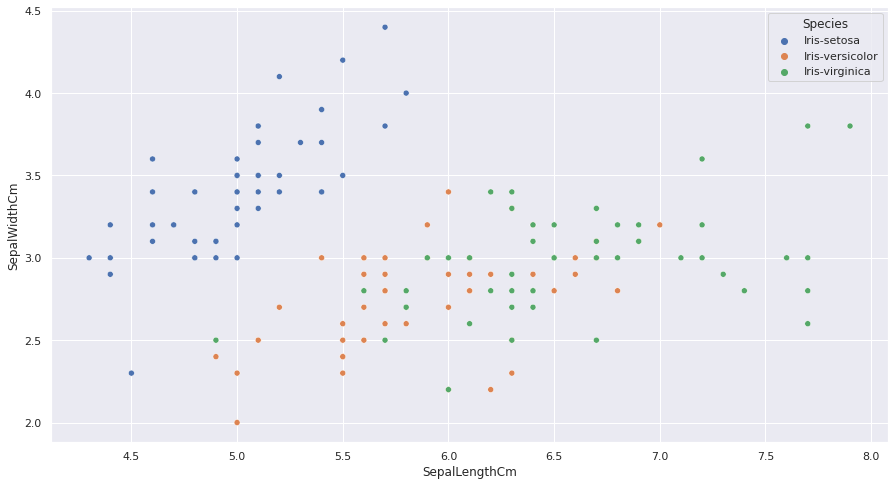

In [47]:
plt.figure(figsize = (15,8)) 
sns.set(style="darkgrid") 
sns.scatterplot(data=df,x="SepalLengthCm",y='SepalWidthCm',hue="Species") 

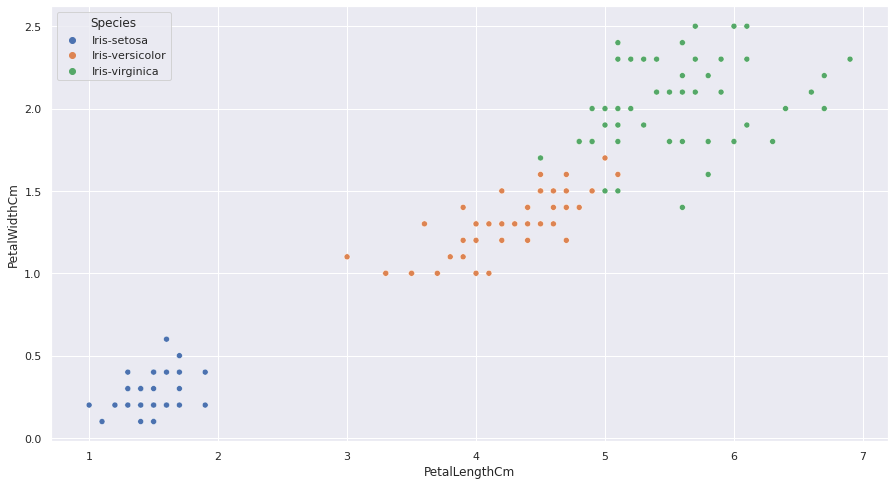

In [48]:


plt.figure(figsize = (15,8)) 
sns.set(style="darkgrid") 
sns.scatterplot(data=df,x="PetalLengthCm",y='PetalWidthCm',hue="Species") 


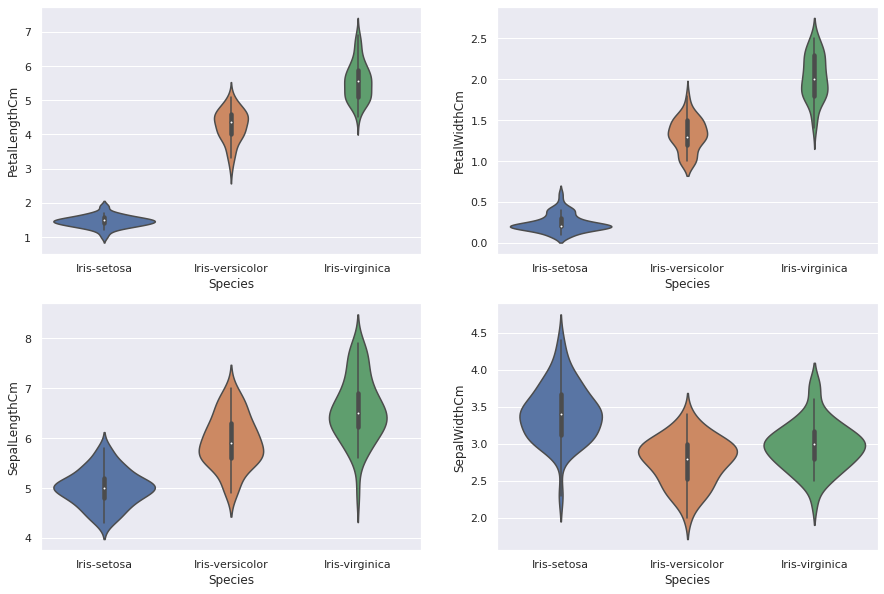

In [49]:
plt.figure(figsize=(15,10)) 
plt.subplot(2,2,1) 
sns.violinplot(x='Species',y='PetalLengthCm',data=df) 
plt.subplot(2,2,2) 
sns.violinplot(x='Species',y='PetalWidthCm',data=df) 
plt.subplot(2,2,3) 
sns.violinplot(x='Species',y='SepalLengthCm',data=df) 
plt.subplot(2,2,4) 
sns.violinplot(x='Species',y='SepalWidthCm',data=df) 


#Visualizing Correlation


In [50]:
#Visualizing Correlation

df.corr() 


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000

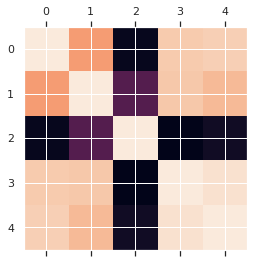

In [51]:

plt.matshow(df.corr()) 
plt.show()

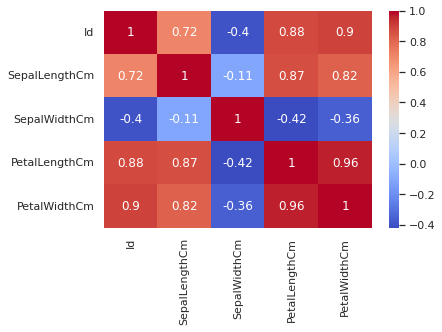

In [52]:
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm') 


In [53]:

#Setting dependeant and independant variables

X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 

In [54]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

In [55]:
from sklearn import decomposition 
from sklearn import datasets 

In [56]:
np.random.seed(5) 

In [57]:
 
iris = datasets.load_iris() 
X = iris.data 
y = iris.target 
 

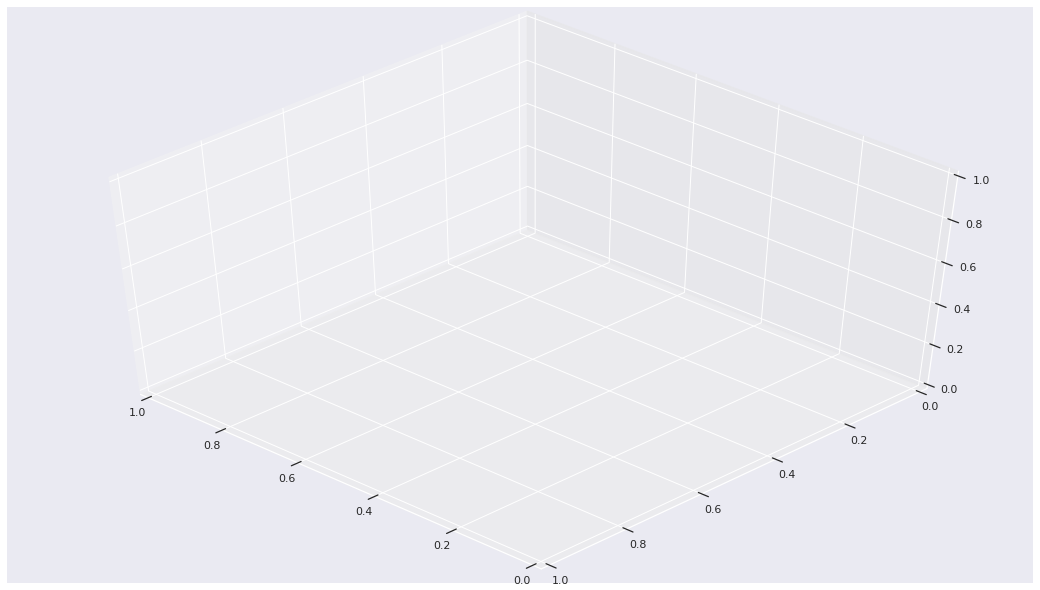

In [58]:
fig = plt.figure(1, figsize=(15, 8)) 
plt.clf() 
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

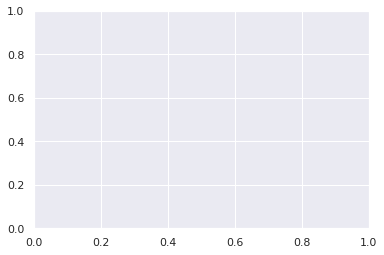

In [59]:
 
plt.cla() 
pca = decomposition.PCA(n_components=3) 
pca.fit(X) 
X = pca.transform(X) 
 

In [63]:
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:     
    ax.text3D(X[y == label, 0].mean(),X[y == label, 1].mean() + 1.5,X[y == label, 2].mean(), name,horizontalalignment='center',bbox=dict(alpha=.5, edgecolor='w', facecolor='w')) # Reorder the labels to have colors matching the cluster results
y = np.choose(y.astype(int), [1, 2, 0]).astype(float) 
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,  edgecolor='k')   
ax.w_xaxis.set_ticklabels([]) 
ax.w_yaxis.set_ticklabels([]) 
ax.w_zaxis.set_ticklabels([]) 
plt.show() 

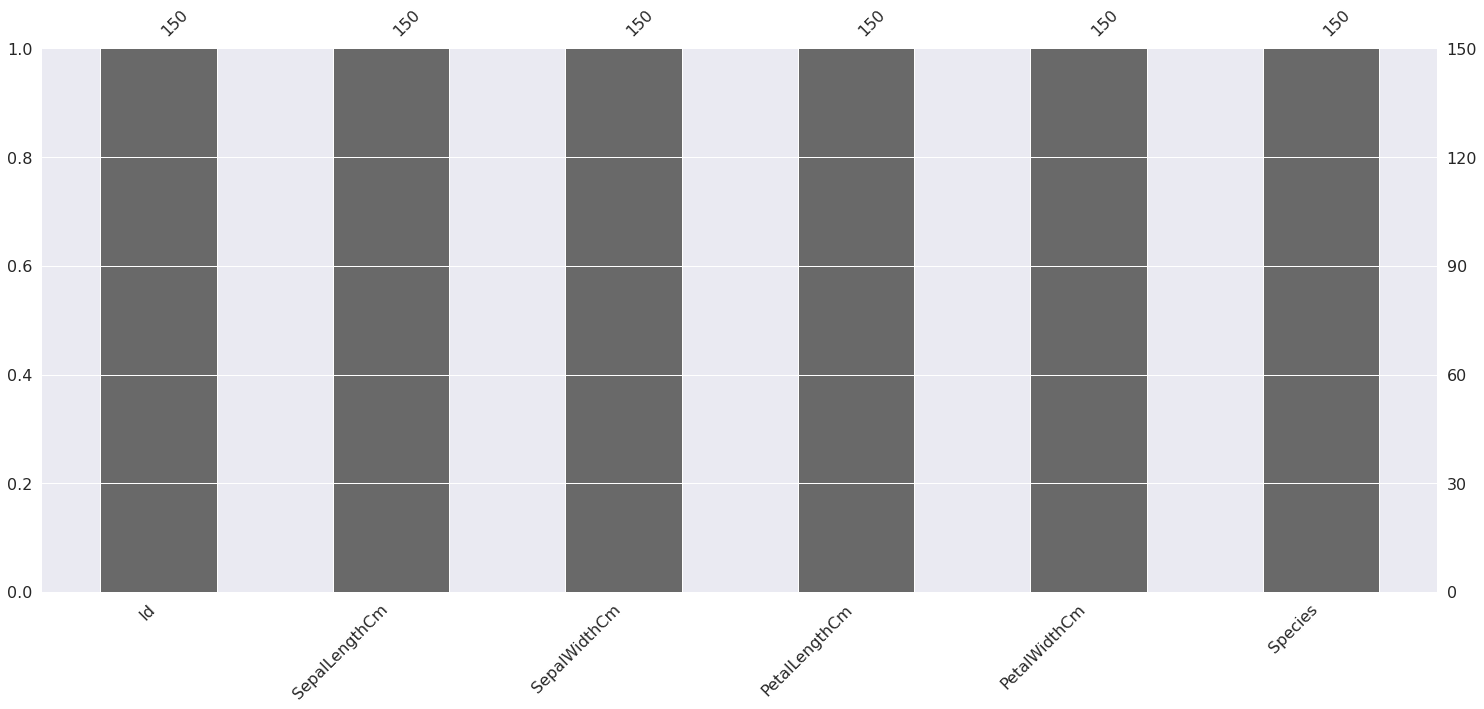

In [64]:
import missingno as msno 
p=msno.bar(df) 

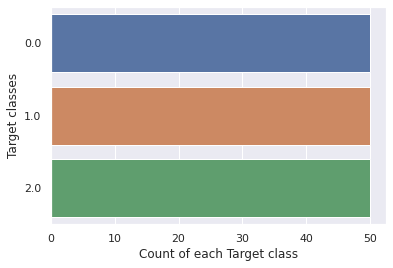

In [65]:

sns.countplot(y=y ,data=df) 
plt.xlabel("Count of each Target class") 
plt.ylabel("Target classes") 
plt.show() 

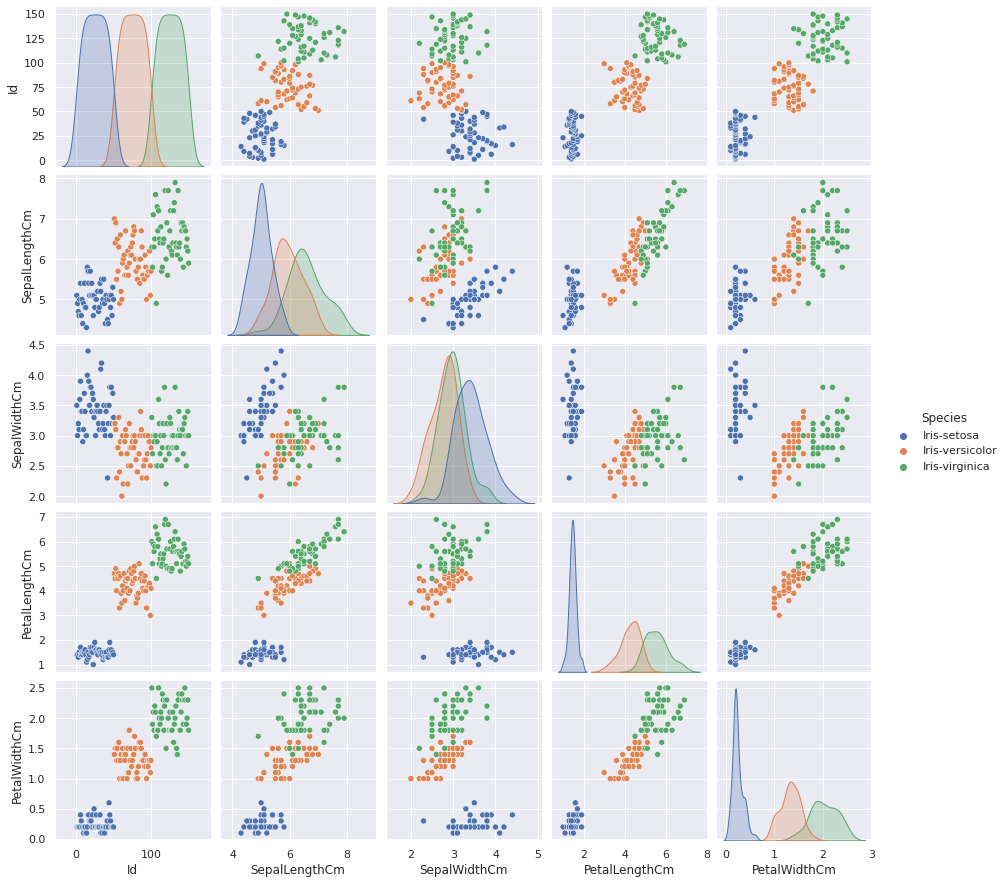

In [66]:
p=sns.pairplot(df, hue = 'Species') 

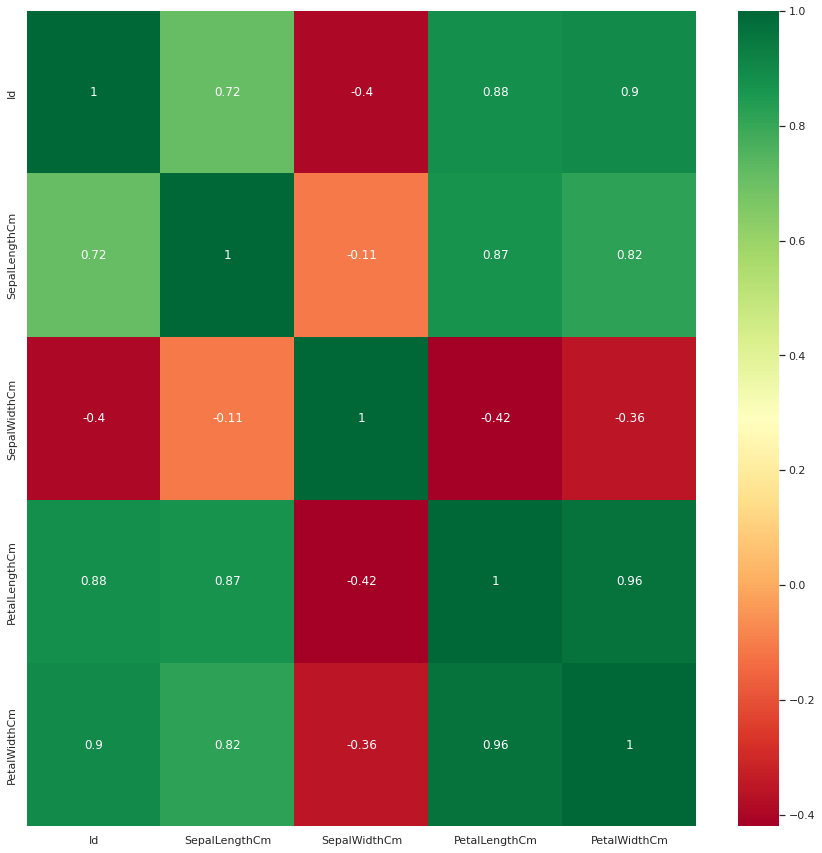

In [68]:
plt.figure(figsize=(15,15)) 
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')

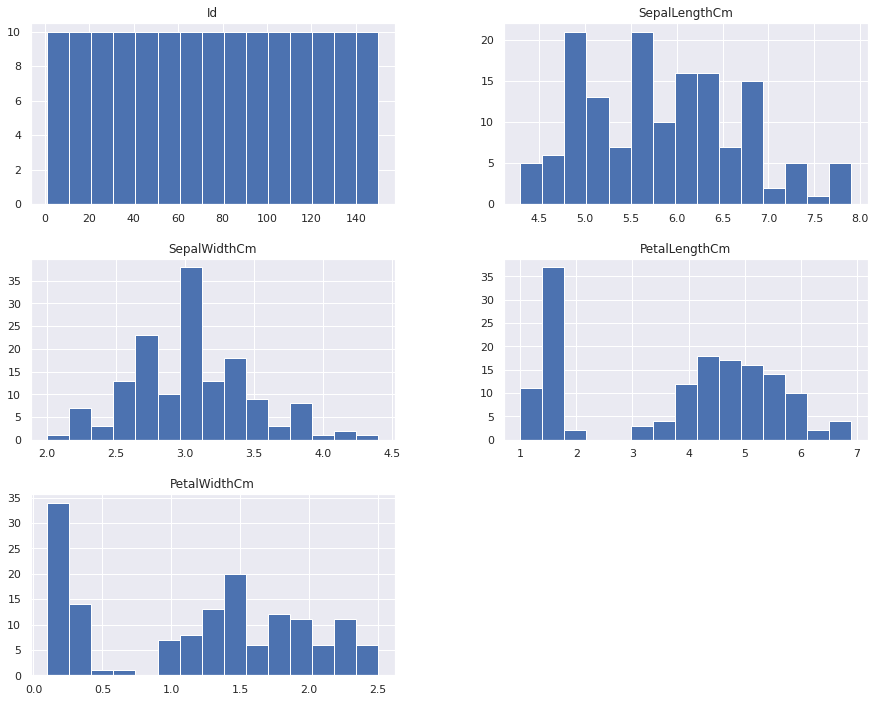

In [69]:
df.hist(figsize=(15,12),bins = 15) 
plt.title("Features Distribution") 
plt.show() 


#Encoding categorical data 

In [70]:
# LabelEncoder for encoding binary categories in a column
from sklearn.preprocessing import LabelEncoder 
 

In [71]:
le = LabelEncoder()  # One single vector so it is ovbious what we want to enc 
y = le.fit_transform(y) 
print(y) 


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


#Splitting the dataset into the Training set and Test set

In [72]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [73]:
#Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

In [75]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test) 
print(X_train)
print(X_test) 

[[ 0.40648348  0.01540903 -0.01622987]
 [ 1.46700498  1.5620388  -1.11120705]
 [-0.00380648 -1.16052585 -0.7729742 ]
 [ 1.00465028 -0.3597485   0.53564433]
 [ 0.74376099 -1.06592863  2.13231732]
 [-1.25968811  1.32941686 -0.04033246]
 [ 0.06319687 -1.68307843 -0.58665658]
 [-1.30648635  0.75710714 -0.47339974]
 [ 0.5022101   0.24884321 -1.01761435]
 [ 1.10053801 -0.43274441 -1.15395129]
 [ 1.02502099  0.55212196  0.12927681]
 [-1.31073778  0.75669865  0.1068883 ]
 [ 0.6054092  -1.54007192 -1.14282363]
 [ 0.93086029 -0.29552967  0.38179268]
 [ 0.48087462  0.5779929  -1.37934425]
 [ 1.81594335  0.63998453 -1.71031915]
 [-1.09313144  1.95750624 -0.38730882]
 [-1.34975848  0.78860382  0.3201065 ]
 [-1.34283687 -0.44639384 -0.31122463]
 [-0.02999455 -1.45858735  0.96254998]
 [-1.28245455  0.5794526  -0.2520589 ]
 [-1.29954943  1.37214155 -0.88510721]
 [ 1.6662116   2.60586902  0.46743584]
 [ 0.99688805  0.88606868  0.10898251]
 [ 1.39717666  0.85013399 -1.39583337]
 [ 1.02203492 -0.37590533

#KNN


In [76]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2) 
classifier.fit(X_train, y_train) 


KNeighborsClassifier()

In [77]:
y_pred = classifier.predict(X_test) 
y_pred = classifier.predict(X_test) 
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test.reshape(len(y_test),1)),1))))


[[2]
 [0]
 [0]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [0]
 [2]
 [1]
 [0]
 [0]
 [2]
 [0]
 [1]
 [2]
 [2]
 [0]
 [1]
 [0]
 [2]
 [1]
 [0]
 [2]
 [2]
 [0]
 [1]
 [2]
 [0]
 [0]
 [2]
 [1]
 [0]
 [1]
 [2]
 [2]
 [1]
 [0]
 [2]
 [1]
 [0]
 [0]
 [2]
 [0]
 [0]
 [2]
 [2]
 [0]
 [0]
 [0]
 [2]
 [1]
 [0]
 [2]
 [2]
 [0]
 [1]]


In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score 
cm = confusion_matrix(y_test, y_pred) 
print(cm) 
accuracy_score(y_test, y_pred) 


[[10  3  0]
 [ 0  6  0]
 [ 0  0 11]]


0.9

In [80]:
from sklearn.decomposition import PCA 
pca = PCA() 
X_new = pca.fit_transform(X) 
pca.get_covariance()

array([[ 4.22824171e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.42670748e-01, -2.26003658e-17],
       [ 0.00000000e+00, -2.26003658e-17,  7.82095000e-02]])

In [81]:

explained_variance=pca.explained_variance_ratio_ 
explained_variance


array([0.92946326, 0.05334452, 0.01719222])

In [82]:


print(pca.explained_variance_) 
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_.cumsum()) 


[4.22824171 0.24267075 0.0782095 ]
[0.92946326 0.05334452 0.01719222]
[0.92946326 0.98280778 1.        ]


In [83]:
# component loadings
loadings = pca.components_ 
print(loadings) 

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  1.00000000e+00 -1.11022302e-16]
 [ 0.00000000e+00  5.55111512e-17  1.00000000e+00]]


In [84]:
! pip install bioinfokit
from bioinfokit.visuz import cluster 
from bioinfokit.analys import get_data 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86 kB 4.0 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58665 sha256=4db9512fbcc33f4db98a38d673cf01eceaeab12c02b0fc88473bbe756792defb
  Stored in directory: /root/.cache/pip/wheels/81/e6/c8/a378f0c300eba657e42ae0df674e32e6d434d96a7eb765b067
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=70c3a15de99fbad537dd44ea02362c9e6d8478018cc842da6a6d2ac255ddc7d9
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [85]:
 
# load iris dataset
df = get_data('iris').data 
df.head(2) 

sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa

In [86]:
X = df.iloc[:,0:4] 
target = df['class'].to_numpy() 

In [87]:
X_st =  StandardScaler().fit_transform(X) 
pca_out = PCA().fit(X_st)


In [88]:

loadings = pca_out.components_ 
print(loadings)


[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


In [89]:
pca_out.explained_variance_

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [90]:
pca_scores = PCA().fit_transform(X_st) 
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values,var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), colorlist=target)


In [91]:
from numpy.linalg import eig 

In [92]:
eigenvalues, eigenvectors = eig(X.cov()) 
print(eigenvalues) 
print(eigenvectors) 


[4.22484077 0.24224357 0.07852391 0.02368303]
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


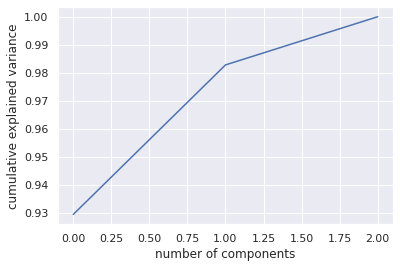

In [93]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 
pca=PCA(n_components=3) 
X_new=pca.fit_transform(X) 
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)


In [94]:
knn_pca = KNeighborsClassifier(7) 
knn_pca.fit(X_train_new,y_train) 
print("Train score after PCA: ",knn_pca.score(X_train_new,y_train),"%") 
print("Test score after PCA: ",knn_pca.score(X_test_new,y_test),"%") 


Train score after PCA:  0.9809523809523809 %
Test score after PCA:  0.9333333333333333 %


(-2.191351689050653, 2.178648310949254)

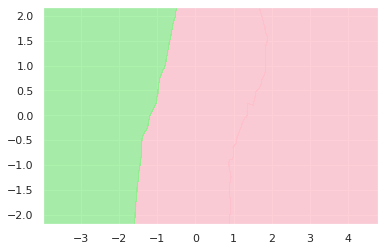

In [95]:
classifier = knn_pca 
from matplotlib.colors import ListedColormap 
X_set, y_set = X_test_new, y_test 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),                     
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

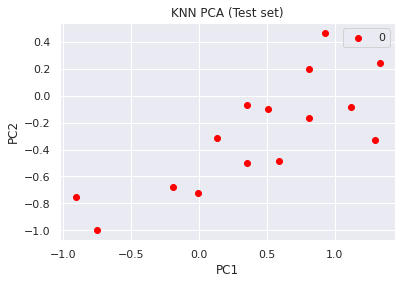

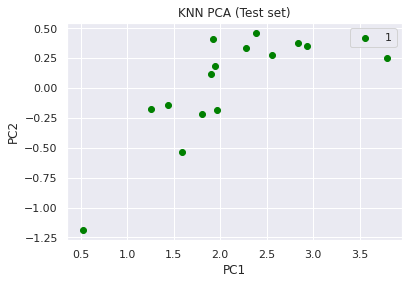

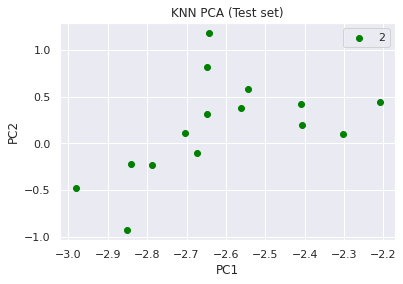

In [96]:
for i, j in enumerate(np.unique(y_set)):     
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],                
              c = ListedColormap(('red', 'green'))(i), label = j) 
  plt.title('KNN PCA (Test set)') 
  plt.xlabel('PC1') 
  plt.ylabel('PC2') 
  plt.legend() 
  plt.show()